The following code is to make basic analysis on the data survey data.
Planned:
- Age distribution
- Gender distribution
- Geographical location
- Academic institutions distribution
- Devices needed

In [113]:
#import necessary libraries
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import unidecode
import os
from collections import Counter
import numpy as np

In [8]:


# where all survey answers are stored:
filePath = "/home/andre/Documents/repositories/amchagas/map_fosh_demand/survey/answers/"

#use code to take all the file names from that folder:
fileNames = os.listdir(filePath)
print (fileNames)

['data.csv', 'RdP_FOSH_20180923_form_responses_1.tsv', '20190208_temp.csv']


In [9]:
#
allEntries = list() # create list to hold answers
allHeaders = list() # create list to hold headers (questions in each language)
fh = open(filePath+"RdP_FOSH_20180923_form_responses_1.tsv","r") #file handle just for first file for now
rawData = csv.reader(fh,dialect = csv.excel_tab) # create iterator for the tsv separated file 
first_read = 1
    
for entry in rawData: # run the iterator
    if first_read == 1:
        allHeaders.append(entry)
        first_read = 0
    else:
        allEntries.append(entry) #append each run to list

fh.close() # whend done, close file

In [45]:


headers = pd.DataFrame(allHeaders)
data = pd.DataFrame(allEntries) # transform list into pandas data frame

headers



,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,Timestamp,Sexo:,Idade (em anos),País:,Estado:,Cidade:,Escolaridade:,Formação:,Possui vínculo com alguma instituição?,"Se sim, qual o nome dessa instituição? (opcional)",...,"Poderia em algumas palavras, nos dizer a razão?",Qual(is) equipamento(s) o seu laboratório mais...,Algum projeto já teve de ser alterado por falt...,"Se sim, qual equipamento causou a alteração no...",Caso tenha ocorrido alguma alteração de projet...,Se você pudesse comprar um equipamento novo pa...,Considera viável a opção de adquirir equipamen...,Já teve oportunidade de testar equipamentos de...,Caso já tenha testado produtos de uma nova mar...,"Gostaria de ter acesso, para testes, à equipam..."


In [91]:
#data

#clean data by making all strings lower case with no accents, and removing trailling "." and empty spaces

for column in data:
    data[column] = lowers = [str.lower(i) for i in data[column] ]
    data[column] = [unidecode.unidecode(i) for i in data[column]]
    #print(column)
    for i in range(len(data[column])):# run through all columns
        if len(data[column][i])>0: # exception handling. When people leave an answer blank
            if data[column][i][-1] == " " or data[column][i][-1] == ".":   # remove trailing punctuation
                data[column][i] = data[column][i][:-1]

In [92]:

#use the index on the left in headers (printed above) to change the language of the questions.
#change the code below in where there are brackets with a number inside to the index number you picked:
#eg headers.loc[0][:] to headers.loc[1][:] (when more languages are available)
#All data from all languages will still be pooled together

#data.set_axis([list(range(len(headers.loc[0][:]))),headers.loc[0][:]],axis=1,inplace=True)

data

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,8/22/2018 20:04:49,masculino,54,brazil,rio grande norte,natal,doutorado,medicina,"sim, instituicao publica",ufrn,...,pouca divulgacao dos equipamentos e centraliza...,"poligrafo (medida des de sinais bieletricos), ...",sim,actigrafos,por quebra do equipamento existente e demora n...,poligrafo (para eeg),sim,sim,buscava um preco mais acessivel,sim
1,8/22/2018 20:50:50,masculino,28,brazil,sao paulo,presidente prudente,"doutorado, em andamento",quimica-bacharelado,"sim, instituicao publica",unesp,...,muitos equipamentos sao de uso limitado ao gru...,"espectrofotometria uv-vis, espectroscopia ft-ir",sim,analise elementar chns-o; icp-ms; viscosimetro,alteracao no momento de planejamento,analise elementar chns-o,sim,nao,,
2,8/22/2018 20:57:05,feminino,32,brazil,rj,rio de janeiro,doutorado,ciencias biologicas,"sim, instituicao publica",fiocruz,...,,"espectrofotometro, microscopio",nao,,"apesar de dificuldades com equipamentos, nao f...",microscopio confocal,sim,nao,,
3,8/22/2018 21:09:13,masculino,22,brazil,sao paulo,botucatu,"graduacao - bacharelado, em andamento",engenharia de bioprocessos e biotecnologia,"sim, instituicao publica",unesp,...,,computadores,nao tenho conhecimento,nao,nenhuma alteracao no projeto de pesquisa foi n...,uma maquina propria,sim,nao,,
4,8/22/2018 21:30:34,masculino,26,brazil,sao paulo,sao paulo,graduacao - bacharelado,quimica,"sim, instituicao publica",usp,...,,"hplc-dad, gc-ms, rmn(analise paga, feita no iq...",sim,hplc-ms,equipamento indisponivel (outras razoes alem d...,hplc-ms,sim,nao,,
5,8/22/2018 21:34:34,feminino,29,brazil,minas gerais,belo horizonte,doutorado,doutorado em biologia celular,"sim, instituicao publica",ufmg,...,,termocicladores e aparatos de eletroforese,sim,citometro de fluxo e microscopio de fluorescencia,por quebra do equipamento existente e demora n...,citometro de fluxo com imagem (imaging flow cy...,talvez,sim,buscava um preco mais acessivel,sim
6,8/22/2018 21:35:17,masculino,22,brazil,sao paulo,botucatu,em andamento,graduando em engenharia de bioprocessos e biot...,"sim, instituicao publica",universidade estadual paulista julio de mesqui...,...,"muitos pesquisadores e poucos equipamentos, e ...","eletrodos, celulas eletroquimicas, potenciados...",nao,,,,sim,nao,,
7,8/22/2018 21:38:24,masculino,28,brazil,sao paulo,campinas,mestrado,quimica,"sim, instituicao publica",unicamp,...,,qtof,sim,qtof,por quebra do equipamento existente e demora n...,ion mobility ou orbitrap,talvez,nao,,
8,8/22/2018 21:52:10,masculino,42,brazil,rio de janeiro,campos dos goytacazes,doutorado,profissional de educacao fisica,"sim, instituicao privada",,...,,eletroencefalograma (eeg),sim,eeg,equipamento indisponivel (outras razoes alem d...,eeg quantitativo com foto estimulador,sim,nao,,
9,8/22/2018 22:24:21,feminino,34,brazil,sao paulo,araras,doutorado,biologa,"sim, instituicao publica",instituto agronomico de campinas,...,o preco de alguns equipamentos e muito elevado,"centrifuga, termociclador comum e tempo real, ...",sim,hplc,"apesar de dificuldades com equipamentos, nao f...",hplc,sim,nao,,


range(19, 68, 5)


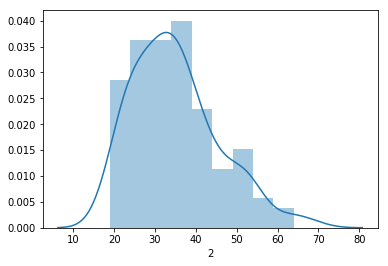

In [68]:
#age distribution:
numTemp = pd.to_numeric(data[2])
# get the range and divide interval in 5 bins
#binRange = range(min(numTemp),max(numTemp),int((max(numTemp)-min(numTemp))/5))
# get the range and splited it into 5 year steps
binRange = range(min(numTemp),max(numTemp),5)
print(binRange)
sns.distplot(numTemp,bins=binRange)


Counter({'feminino': 64, 'masculino': 41, 'prefiro nao responder': 1})


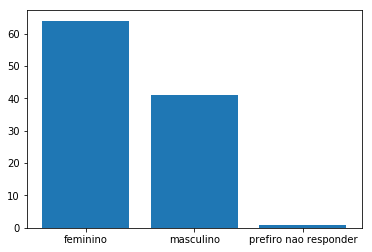

Counter({'brazil': 101, '': 5})


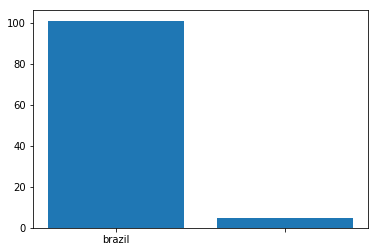

Counter({'rio de janeiro': 23, 'sao paulo': 22, 'rj': 8, 'parana': 7, 'minas gerais': 6, 'sp': 6, 'rs': 5, 'bahia': 3, 'ceara': 2, 'rio grande do sul': 2, 'ms': 2, 'pr': 2, 'mato grosso do sul': 2, 'santa catarina': 2, 'rio grande norte': 1, 'so paulo': 1, 'pb': 1, 'para': 1, 'sergipe': 1, 'sc': 1, 'mato grosso': 1, 'pi': 1, 'am': 1, 'ba': 1, 'mg': 1, 'pernambuco': 1, 'amazonas': 1, 'mt': 1})


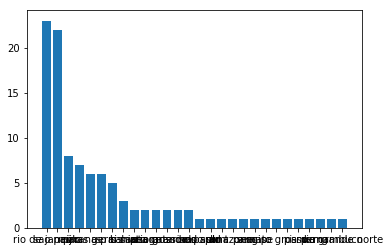

Counter({'rio de janeiro': 13, 'sao paulo': 10, 'campinas': 7, 'curitiba': 6, 'porto alegre': 4, 'botucatu': 3, 'belo horizonte': 3, 'campos dos goytacazes': 3, 'niteroi': 3, 'nova friburgo': 3, 'salvador': 3, 'campo grande': 3, 'sao carlos': 2, 'manaus': 2, 'rio das ostras': 2, 'natal': 1, 'presidente prudente': 1, 'araras': 1, 'jundiai': 1, 'barbacena': 1, 'iguatu': 1, 'sao jose de uba': 1, 'sao gabriel': 1, 'porto ferreira': 1, 'joao pessoa': 1, 'ponta pora': 1, 'franca': 1, 'pelotas': 1, 'caucaia': 1, 'dois vizinhos': 1, 'nova iguacu': 1, 'realeza': 1, 'santarem': 1, 'aracaju': 1, 'chapeco': 1, 'barueri': 1, 'florianopolis': 1, 'primavera do leste': 1, 'floriano': 1, 'maringa': 1, 'rj': 1, 'fln': 1, 'aruja': 1, 'sao goncalo': 1, 'volta redonda': 1, 'vicosa': 1, 'inconfidentes': 1, 'itaperuna': 1, 'vitoria de santo antao': 1, 'uberaba': 1, 'feira de santana': 1, 'cuiaba': 1, 'marica': 1, 'caxias do sul': 1})


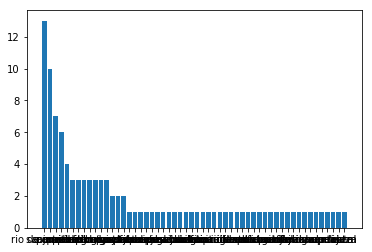

Counter({'doutorado': 39, 'doutorado, em andamento': 9, 'mestrado': 9, 'graduacao - bacharelado, em andamento': 8, 'graduacao - bacharelado': 6, 'graduacao - licenciatura': 6, 'mestrado, em andamento': 4, 'graduacao - licenciatura, em andamento': 4, 'especializacao': 4, 'em andamento': 2, 'pos doutorado': 2, 'graduacao - bacharelado, graduacao - licenciatura, em andamento': 2, 'doutorado, pos doutorado': 1, 'graduacao - bacharelado, graduacao - licenciatura': 1, 'graduacao - bacharelado, especializacao, doutorado': 1, 'graduacao - licenciatura, mestrado': 1, 'graduacao - licenciatura, especializacao': 1, 'pos-dov': 1, 'pos-doc': 1, 'graduacao - bacharelado, graduacao - licenciatura, especializacao': 1, 'ensino fundamental, ensino medio, tecnico ou tecnologo, graduacao - licenciatura, em andamento': 1, 'graduacao - bacharelado, graduacao - licenciatura, mestrado, doutorado, pos doutorado em tecnologia farmaceutica': 1, 'tecnico ou tecnologo, graduacao - bacharelado, em andamento': 1})


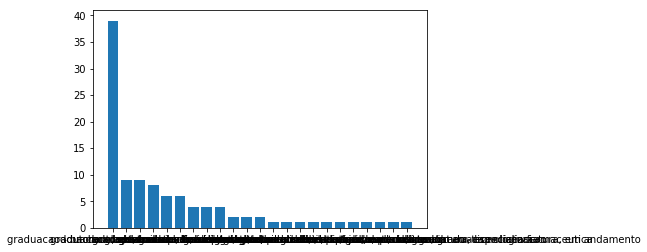

Counter({'ciencias biologicas': 9, 'biologia': 6, 'biologo': 6, 'quimica': 4, 'biologa': 4, '': 4, 'medicina': 3, 'engenharia de bioprocessos e biotecnologia': 3, 'biomedica': 3, 'farmacia': 3, 'biotecnologia': 3, 'engenharia quimica': 3, 'ciencia da computacao': 2, 'fisica': 2, 'farmaceutica': 2, 'bioquimica': 2, 'licenciatura em ciencias biologicas': 2, 'quimica-bacharelado': 1, 'doutorado em biologia celular': 1, 'graduando em engenharia de bioprocessos e biotecnologia': 1, 'profissional de educacao fisica': 1, 'engenheira de alimentos': 1, 'professor': 1, 'nutricao': 1, 'farmacia/ ciencias biologicas': 1, 'bacharel em biotecnologia': 1, 'eng. de biossistemas': 1, 'biologia prof': 1, 'biotecnologista': 1, 'licenciado em quimica': 1, 'pesquisadora': 1, 'estudante': 1, 'fisica /biofisica': 1, 'formacao de professores': 1, 'educacao fisica': 1, 'graduando': 1, 'agronomia': 1, 'fonoaudiologa': 1, 'quimico': 1, 'biomadicina': 1, 'literatura e linguistica': 1, 'ciencias biologicas - biote

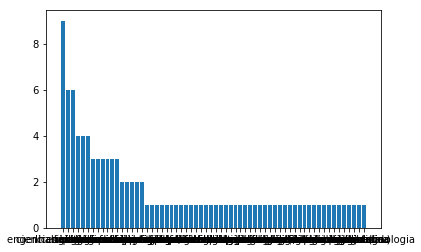

Counter({'sim, instituicao publica': 77, 'nao': 20, 'sim, instituicao privada': 9})


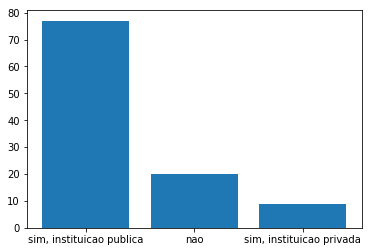

In [119]:
for i in [1,3,4,5,6,7,8]:
    genderCounts = list(data[i].values)
    genderCounts = Counter(list(genderCounts))
    print(genderCounts)
    labels, values = zip(*genderCounts.items())


    # sort your values in descending order
    indSort = np.argsort(values)[::-1]

    # rearrange your data
    labels = np.array(labels)[indSort]
    values = np.array(values)[indSort]

    indexes = np.arange(len(labels))

    bar_width = 0.35

    plt.bar(indexes, values)

    # add labels
    plt.xticks(indexes , labels)
    plt.show()

#BITS OF CODE FROM https://stackoverflow.com/questions/35596128/how-to-generate-a-word-frequency-histogram-where-bars-are-ordered-according-to

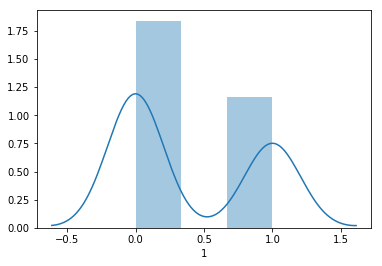

In [98]:
dummie = data[1]=="masculino"
sns.distplot(dummie+0)

In [13]:
#display raw data
print(data[24])

                                                    24
0                                 poligrafo (para eeg)
1                             analise elementar chns-o
2                                 microscopio confocal
3                                  uma maquina propria
4                                              hplc-ms
5    citometro de fluxo com imagem (imaging flow cy...
6                                                     
7                             ion mobility ou orbitrap
8                eeg quantitativo com foto estimulador
9                                                 hplc
10                             incubadora com agitacao
11                            computadores workstation
12                                                    
13                                                    
14                                 analisador de gases
15                        nn consigo definir apenas um
16                                              inbody
17        

In [14]:
#get counts for all columns (to plot histograms of the answers)
allCounts = list()
for column in data:
        anssub = list(data[column])
        allCounts.append(dict((x, anssub.count(x)) for x in anssub))

/home/andre/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


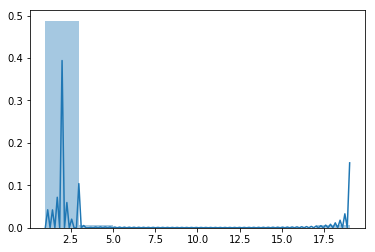

In [15]:
entry = 24

sns.distplot(list(allCounts[entry].values()),label=list(allCounts[entry].keys()))
#sns.distplot(pd.to_numeric(data["Idade (em anos)"]),bins=range(10,90,1))
plt.show()


In [16]:
dummie = pd.DataFrame(index=[0,1,2], columns=[[1,2,3],["t1","r2","r3"]])

In [17]:
dummie

,1,2,3
,t1,r2,r3
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN


In [18]:
data.to_csv(path_or_buf=filePath+"data.csv",mode="w")